# Assignment 1

In [113]:
import pandas as pd
import numpy as np
from datetime import datetime

# load data
df = pd.read_csv("DST_BIL54.csv")
df['time'] = pd.to_datetime(df['time'])
df = df.set_index("time")

In [58]:
test_split_date = "2023-12-01"
df_train = df[df.index<=datetime.fromisoformat(test_split_date)]
df_test = df[df.index>datetime.fromisoformat(test_split_date)]

-----

### 1 Plot Data

**1.1** Make a time variable, x, such that 2018-Jan has x0 = 2018, 2018-Feb has x1 = 2018 + 1/12, 2018-Mar has x2 = 2018 + 2/12 etc. and plot the training data versus x.

In [61]:
df_train['x'] = df_train.index.year+((df_train.index.month-1)/12)

/var/folders/5b/3rjqcwwn5s93khgglxljhv140000gn/T/ipykernel_83760/107854309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['x'] = df_train.index.year+((df_train.index.month-1)/12)


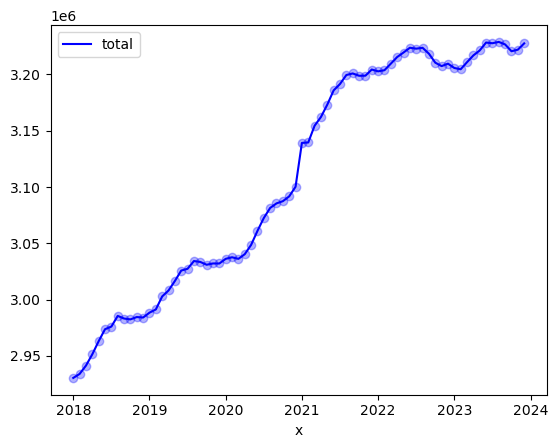

In [66]:
import matplotlib.pyplot as plt

plt.plot(df_train.x,df_train.total, c='b', label='total')
plt.scatter(df_train.x,df_train.total, c='b', alpha=0.3)
plt.xlabel("x")
#plt.ylabel("total")
plt.legend()

Apart from a huge jump between 2021 and 2022, the data almost follows a linear trendline, especially between 2018 and beginning 2021.
After the mentioned jump, the linear trend continues for approx. 6 motnhs in 2021. Then the model shows signs of stagnating growth for the total number of cars.
From end 2021 to 2024, the data follows almost a linear trend again, but with a smaller slope. 
This can be interpreted as a saturation in car registration across Denmark. Reasons could be: 
1. most of the population already has a car and no further need to register a new car
2. due to some legislation or other factor it has become less popular of viable to register a new car, which causes weaker demand for new car registrations

### 2 Linear trend model


We will now make a linear trend model, which is a general linear model (GLM) of the form:

$$Y_t = θ_1 + θ_2 · x_t + ϵ_t \tag{1}$$

where $ϵ_t ∼ N (0, σ^2)$ is assumed i.i.d. The time is $t = 1, . . . , N $.


**2.1.** Write up the model on matrix form for the first 3 time points: First on matrix form (as vectors
and matrices), then insert the elements in the matrices and vectors and finally, insert the actual
values of the output vector y and the design matrix $\mathbf{X}$ (keep max 3 digits). All group participants
do it – include picture for each in the report.

We are creating a model for only 2 parameters ($p=2, \theta \in \mathbb{R}^2$). Each row of the design matrix $\mathbf{X}$ corresponds to one point in time or one time step.

Thus for 3 timesteps ($n=3$) we have $\mathbf{X} \in \mathbb{R}^{n \times p} \hat{=} \mathbb{R}^{3 \times 2}$,  measurements/output $\mathbf{Y} \in \R^3$, $\mathbf{\theta} \in \R^3$ and $\mathbf{\varepsilon} \in \R^3$:

$$\begin{align*}
\mathbf{Y} &= \mathbf{X} \cdot \mathbf{\theta} + \mathbf{\varepsilon} \\

\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\end{bmatrix}
&=
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
1 & x_3 \\
\end{bmatrix}
\begin{bmatrix}
\theta_1 \\
\theta_2 \\
\theta_3 \\
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\varepsilon_3
 \\
\end{bmatrix}
\end{align*}$$

## IMPORTANT BEFORE HAND-IN

What about the $\varepsilon$ noise term?!!
In book p.36&38 for standard linear model, $\mathbb{E}[\varepsilon]=0$ which is the important property that we use to neglect and omit the noise in all further calculations (for a model with gaussian noise, mean 0).

In [73]:
df_train.iloc[0:3]

,total,gasoline,diesel,fgas,ngas,electricity,petroleum,hydrogen,methanol,ethanol,pluginhybrid,otherfuels,x
time,,,,,,,,,,,,,
2018-01-01,2930483,1781826,1136656,12,256,9304,0,81,0,0,2340,8,2018.000000
2018-02-01,2934044,1783338,1138414,12,255,9343,0,80,0,0,2593,9,2018.083333
2018-03-01,2941422,1787219,1141576,12,257,9399,0,77,0,0,2873,9,2018.166667


Now with the actual values from the dataset:

$$\begin{bmatrix}
2930483 \\
2934044 \\
2941422 \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 2018.000 \\
1 & 2018.083 \\
1 & 2018.167 \\
\end{bmatrix}
\begin{bmatrix}
\theta_1 \\
\theta_2 \\
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\varepsilon_3
 \\
\end{bmatrix}$$

**2.2** Present the values of the parameter estimates $\hat{\theta}$ and $\hat{\theta}$ and their estimated standard errors ˆσˆθ1 and $\hat{\sigma}_{\hat{\theta}}$ . Plot the estimated mean as a line with the observations as points.

In [ ]:
y = df_train['total'].iloc[0:3].to_numpy()
X = np.ones((3,2))
X[:,1] = df_train.x.iloc[0:3].to_numpy()

# OLS model
theta, res, rank, singular_val = np.linalg.lstsq(X, y, rcond=None)
print(theta)

# estimator and std error
y_hat = X@theta
err = y-y_hat
n = 3
p = 2

[-1.29519565e+08  6.56340000e+04]


std error for each parameter? How?
parameter mean as theta overall

page 39 in book eq. 3.42 & 3.44

In [86]:
# variance of theta / predictor / parameters -> covanriance matrix
sigma_hat_sq = (err.T@err)/(n-p)
var_sigma_hat_sq = sigma_hat_sq*np.linalg.inv(X.T@X)

# std error of parameters
std_err_theta = np.sqrt(np.diag(var_sigma_hat_sq))
print(std_err_theta)

[2.66840576e+07 1.32224756e+04]


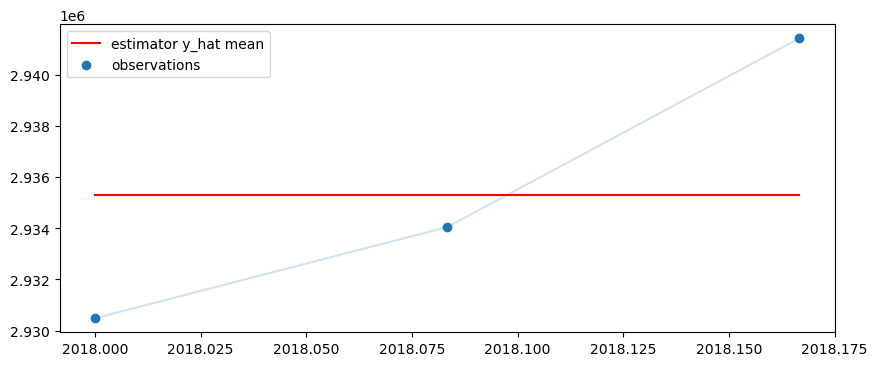

In [98]:
# plot estimated mean with observations as data points
mu_hat = np.repeat(np.mean(y_hat),n)

plt.figure(figsize=(10,4))
plt.plot(df_train.x.iloc[0:n], mu_hat, label='estimator y_hat mean', c='r')
plt.plot(df_train.x.iloc[0:n], y, alpha=0.2)
plt.scatter(df_train.x.iloc[0:n], y, label='observations')
plt.ticklabel_format(style='plain', axis='x', useMathText=False, useOffset=False)
plt.legend()

**2.3.** Make a forecast for the next 12 months - i.e., compute predicted values with corresponding prediction intervals. Present these values in a table.

For the next 12 months, we will need more than the 3 data points initially. Otherwise the predictions will be very weak! 
We are using the train data for this, so we can later check if the predictions are somewhat reasonable.

In [145]:
# algebraic alternative to np.linalg.lstsq OLS
n = len(df_train)
X = np.ones((n,p))
X[:, 1] = df_train.x.to_numpy()
y = df_train.total.to_numpy()

theta = np.linalg.inv(X.T@X)@(X.T@y)

In [146]:
# forecast 12 months - luckily the test data has exactly 12 months

m = len(df_test) # = 12
df_test['x'] = df_test.index.year+((df_test.index.month-1)/12)
X_pred = np.ones((m,p))
X_pred[:,1] = df_test.x.to_numpy()

# prediction
def predict(X:np.array, theta:np.array) -> np.array:
    y_pred = X@theta
    return y_pred

y_hat = X@theta
y_pred = predict(X_pred, theta)

In [ ]:
import scipy

# variances of prediction
sigma_hat_sq = (((y-y_hat).T)@(y-y_hat))/(n-p)

# covariance matrix of predictions; formula taken from 'lecture_week3.R'
### WHY THE '1+...' ???? -> book p.46 proof 3.59
var_pred = sigma_hat_sq*(1+X_pred@np.linalg.inv(X.T@X)@X_pred.T) 

# basically 97.5%-CI for each prediction via Student T distribution
deg_f = n-1 # degrees of freedom
iv_lwr, iv_upr = scipy.stats.t.interval(0.975,deg_f)

# prediction intervals
y_pred_iv_lower = y_pred+iv_lwr*np.sqrt(np.diag(var_pred))
y_pred_iv_upper = y_pred+iv_upr*np.sqrt(np.diag(var_pred))

(3200000.0, 3400000.0)

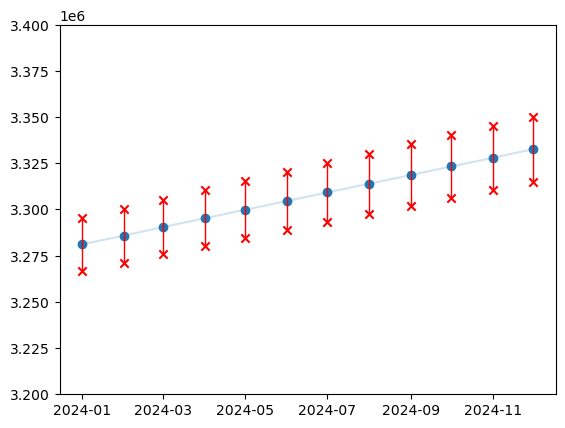

In [207]:
# plotting
plt.plot(df_test.index, y_pred, alpha=0.2)
plt.scatter(df_test.index, y_pred)
plt.scatter(df_test.index, y_pred_iv_lower, marker='x', c='r') 
plt.scatter(df_test.index, y_pred_iv_upper, marker='x', c='r')
plt.vlines(df_test.index, y_pred_iv_lower, y_pred_iv_upper, linestyles='-', label='97.5%-Confident prediction intervals', colors='r', lw=1)
plt.ylim((3200000, 3400000))

In [208]:
print(y_pred_iv_upper-y_pred_iv_lower)

[28504.33138152 29096.01389944 29691.41716799 30290.32177661
 30892.5240875  31497.83495642 32106.07856257 32717.09133877
 33330.72099358 33946.82561762 34565.27286677 35185.93921546]


It looks like the prediction intervals don't get larger the further one goes in time. However, they actually do! It is just extremely marginal, so it is not very visible in the plot.

In [209]:
# presented in a table
df_test['pi_lwr'] = np.round(y_pred_iv_lower,3)
df_test['pi_upr'] = np.round(y_pred_iv_upper,3)
df_test['total_pred'] = np.round(y_pred,3)

df_test[['total_pred', 'pi_lwr', 'pi_upr']]

,total_pred,pi_lwr,pi_upr
time,,,
2024-01-01,3281153.705,3266901.540,3295405.871
2024-02-01,3285832.418,3271284.411,3300380.425
2024-03-01,3290511.131,3275665.423,3305356.840
2024-04-01,3295189.844,3280044.683,3310335.005
2024-05-01,3299868.557,3284422.295,3315314.819
2024-06-01,3304547.270,3288798.353,3320296.188
2024-07-01,3309225.983,3293172.944,3325279.023
2024-08-01,3313904.696,3297546.151,3330263.242
2024-09-01,3318583.409,3301918.049,3335248.770


**2.4.** Plot the fitted model together with the training data and the forecasted values (also plot the prediction intervals of the forecasted values).

In [210]:
# combine
y_comb = np.concatenate([y, y_pred])
X_comb = np.concatenate([X, X_pred])

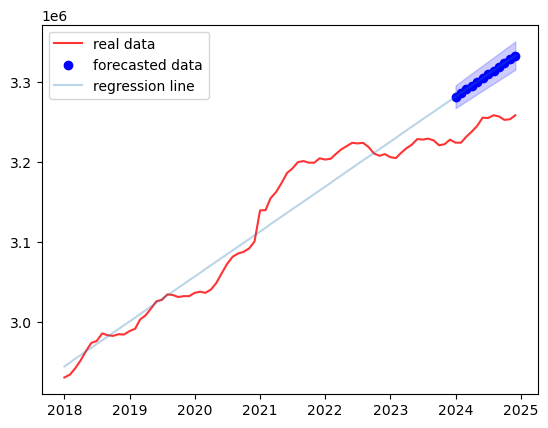

In [211]:
# plotting
plt.plot(df.index, df.total, alpha=.8, c='r', label='real data')
plt.plot(df_test.index, y_pred, alpha=.2, c='b')
plt.scatter(df_test.index, y_pred, c='b', label='forecasted data')
plt.plot(df.index, X_comb@theta, alpha=.3, label='regression line')
plt.fill_between(df_test.index, y_pred_iv_lower, y_pred_iv_upper, color='b', alpha=0.2)
plt.legend()

**2.5.** Comment on your forecast – is it good?

No, it expectedly sucks.

**2.6.** Investigate the residuals of the model. Are the model assumptions fulfilled?

In [212]:
# residuals of the model
res = df.total.to_numpy()-X_comb@theta
print("mean residual: ", np.mean(res))

ssq = res.T@res
print("sum of squares: ", ssq)

mean residual:  -8738.57720669977
sum of squares:  93438731682.72144


In [216]:
# make a 95%-CI funnel

# variances of prediction
sigma_hat_sq = ((res.T)@(res))/(len(df)-p)

# covariance matrix of predictions; formula taken from 'lecture_week3.R'
var_total = sigma_hat_sq*(1+X_comb@np.linalg.inv(X.T@X)@X_comb.T) 

# basically 97.5%-CI for each prediction via Student T distribution
deg_f = len(df)-1 # degrees of freedom
iv_lwr, iv_upr = scipy.stats.t.interval(0.95,deg_f)

# prediction intervals
reg_line = X_comb@theta
y_total_iv_lower = reg_line+iv_lwr*np.sqrt(np.diag(var_total))
y_total_iv_upper = reg_line+iv_upr*np.sqrt(np.diag(var_total))

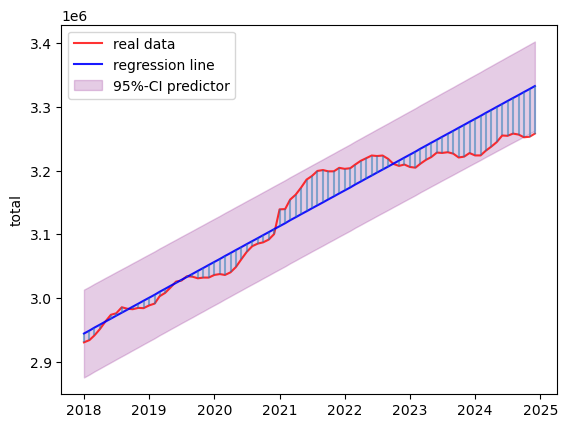

In [217]:
# get residual lines
res_upr, res_lwr = [], []
for i in range(len(df)):
    res_upr.append(max(df.total.iloc[i], reg_line[i]))
    res_lwr.append(min(df.total.iloc[i], reg_line[i]))

# plot
plt.plot(df.index, df.total, alpha=.8, c='r', label='real data')
plt.plot(df.index, X_comb@theta, alpha=.9, label='regression line', c='b')
plt.vlines(df.index, res_lwr, res_upr, alpha=.5)
plt.fill_between(df.index, y_total_iv_lower, y_total_iv_upper, color='purple', alpha=0.2, label='95%-CI predictor')
plt.ylabel('total')
plt.legend()

For overall variance (not the prediction variance), the model looks actually alright. However, based on the initial description of the data, it was expected that towards the most recent years (2023-2025), the model doesn't quite capture the slope change of the data.

In the prediction error, the real data is far outside of the 97.5% confidence interval.
For the predictor itself (the regression line) the real data is outside of the  95%-CI interval boundries towards the end.

Just from visual observation, it is a fair reading to say, that given a standard linear model, the noise is not normally distributed in this case. As described before, one can clearly see systematic effects: large continuous deviation from the mean (regression line), which is only leanient to one side (2021-Aug2022, Aug2022-2025). In a random normal distribution, this would not happen, but rather jump up and down within the confidence interval/standard deviation.

Can the noise be understood as the residual from the regression line? Model assumptions? (noise and linear process)

-----

### 3 WLS - local linear trend model

We will now use WLS to fit the linear trend model in Eq. (1) as a local trend model, i.e., the observation at the latest timepoint ($N$) has weight $λ_0 = 1$, the observation at the second latest timepoint $(N − 1)$ has weight $λ_1$, the third latest observation $(N − 2)$ has weight $λ_2$ etc.

We start by setting $λ = 0.9$

**3.1.** Describe the variance-covariance matrix (the $N × N$ matrix $Σ$ (i.e. $72 × 72$ matrix, so present only relevant parts of it)) for the local model and compare it to the variance-covariance matrix of the corresponding global model.

For a global model (as in the lecture) the variance-covariance matrix $\Sigma \in \R^{N \times N}$ would look something like:

$$\Sigma =
\begin{bmatrix}
\rho_{1,1} & \rho_{1,2} & \rho_{1,3} & \cdots & \rho_{1,N} \\
\rho_{2,1} & \rho_{2,2} & \rho_{2,3} & \cdots & \rho_{2,N} \\
\rho_{3,1} & \rho_{3,2} & \rho_{3,3} & \cdots & \rho_{3,N} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\rho_{N,1} & \rho_{N,2} & \rho_{N,3} & \cdots & \rho_{N,N} \\
\end{bmatrix}$$

In a global model it is assumed that covariances do exist between observations (which also intuitively makes sense for time series). 

However, there is a simplified version, which omits covariances and focuses solely on the variance of individual observations. In effect, what happens is that the variance-covariance matrix becomes only a variance diagonal matrix.

$$\tilde{\Sigma} =
\begin{bmatrix}
\rho_{1,1} & 0 & 0 & \cdots & 0 \\
0 & \rho_{2,2} & 0 & \cdots & 0 \\
0 & 0 & \rho_{3,3} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \rho_{N,N} \\
\end{bmatrix}$$

Here we reach a transition point to the local models. Usually for weighted (global) models the variance-covariance matrix is inverted and then used as a weight matrix. This has the effect, that high covariance/variance gets penalized inverse proportionally. This becomes clearly visible for the (only) variance matrix: 

$$\tilde{\Sigma}^{-1} =
\begin{bmatrix}
\frac{1}{\rho_{1,1}} & 0 & 0 & \cdots & 0 \\
0 & \frac{1}{\rho_{2,2}} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{\rho_{3,3}} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \frac{1}{\rho_{N,N}} \\
\end{bmatrix}$$

which is now a weight matrix (and high $\rho_{i,j}$ for $i,j \in \{1, ..., N\}$ means the weight is small, thus observations with high residuals receive less impact in the model).

The mentioned transition to local models, is basically that one does only consider the diagonal values. Except now for 'local', one replaces the variance-based weights, with other forms of weights, now called $\lambda_{N-i} \in \R$ for $i=j \in \{0, ..., N\}$ in the index. Technically, to be considered a local WLS, only a few weights of on the diagonal need to be set to $0$. This way, the corresponding observation gets taken out of the model (since it is nulled), so fewer data points are considered in the regression.
The idea is that the remaining samples, should be a group of coherent/adjacent samples. Often the most recent samples. E.g.:

$$\tilde{\Sigma}^{-1} =
\begin{bmatrix}
\lambda_{N-0} & 0 & 0 & \cdots & 0 \\
0 & \lambda_{N-1} & 0 & \cdots & 0 \\
0 & 0 & \lambda_{N-2} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \lambda_{N-N} \\
\end{bmatrix}$$

The inverse is actually the more interesting, since it is easier to see how the model is actually weighted. However, for completion:

$$\tilde{\Sigma} =
\begin{bmatrix}
\frac{1}{\lambda_{N-0}} & 0 & 0 & \cdots & 0 \\
0 & \frac{1}{\lambda_{N-1}} & 0 & \cdots & 0 \\
0 & 0 & \frac{1}{\lambda_{N-2}} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \frac{1}{\lambda_{N-N}} \\
\end{bmatrix}$$

here all samples are considered. In the following example, the 2 oldest observations are nulled out:

$$\tilde{\Sigma}_{loc}^{-1} =
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 0 \\
0 & 0 & \lambda_{N-2} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \lambda_{N} \\
\end{bmatrix}$$



To (exponentially) smoothen the effect, in **this exercies**, we choose a model where we set $\lambda_{N-i} := \lambda_{N-i}^{N-i}$. Hence:

$$\tilde{\Sigma}_{loc}^{-1} =
\begin{bmatrix}
\lambda^{N-0} & 0 & 0 & \cdots & 0 \\
0 & \lambda^{N-1} & 0 & \cdots & 0 \\
0 & 0 & \lambda^{N-2} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \lambda^{N-N} \\
\end{bmatrix}$$

For $\lambda = 0.9$, we have, what we consider a 'forgetting factor' (which is for $\lambda \in [0,1)$), hence the matrix becomes:

$$\tilde{\Sigma}_{loc}^{-1} =
\begin{bmatrix}
0.9^{N} & 0 & 0 & \cdots & 0 \\
0 & 0.9^{N-1} & 0 & \cdots & 0 \\
0 & 0 & 0.9^{N-2} & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 0.9^{0} \\
\end{bmatrix}$$

**3.2.** Plot the ”λ-weights” vs. time in order to visualise how the training data is weighted. Which time-point has the highest weight?

Text(0, 0.5, 'total')

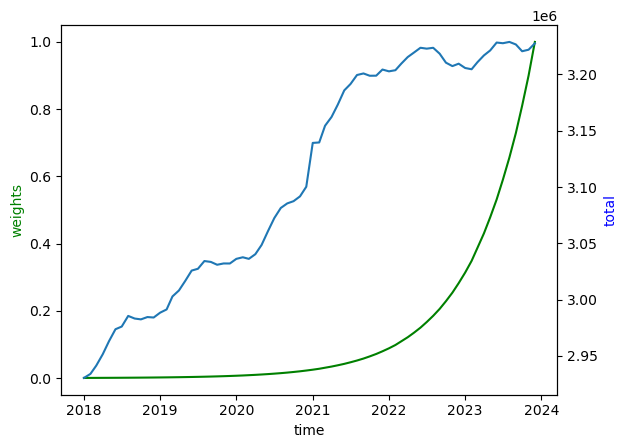

In [ ]:
# plot weights only for training data
df_train['weight'] = np.array([0.9**(len(df_train)-i-1) for i in range(len(df_train))])
weighted = (df_train['total']**df_train['weight']).values

# plotting
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_train.index, df_train['weight'], 'g-')
ax2.plot(df_train.index, df_train.total)
#ax2.scatter(df_train.index, weighted, alpha=0.5)
ax1.set_xlabel('time')
ax1.set_ylabel('weights', color='g')
ax2.set_ylabel('total', color='b')

Minimum weight:  0.0005639208733960184
Maximum weight:  1.0


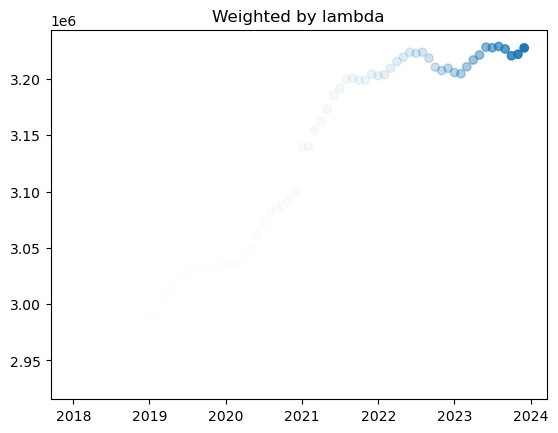

In [272]:
# weighted plot
plt.scatter(df_train.index, df_train.total, alpha=df_train['weight'])
plt.title("Weighted by lambda")

print("Minimum weight: ", np.min(df_train.weight))
print("Maximum weight: ", np.max(df_train.weight))

**3.3.** Also calculate the sum of all the λ-weights. What would be the corresponding sum of weights in an OLS model?

In [273]:
np.sum(df_train.weight)

9.994924712139436

The sum of weights for the current local WLS model is:

$$\sum_{i=0}^N \lambda_i \approx 9.995$$

in a corresponding OLS model, the sum would be $N$, since $\lambda_i = 1 \ \forall i$.

**3.4.** Estimate and present $θ_1$ and $θ_2$ corresponding to the WLS model with λ = 0.9.

In [289]:
# create a WLS model
p = 2 # num parameters - 2 for linear
Sigma_inv = np.eye(len(df_train))*df_train.weight.to_numpy().reshape(-1,1)
X_train = np.ones((len(df_train),p))
X_train[:,1] = df_train['x'].to_numpy()
y_train = df_train.total.to_numpy()
theta = np.linalg.inv(X_train.T@Sigma_inv@X_train)@X_train.T@Sigma_inv@y_train

print("parameters \\$theta$: ", theta)

parameters \$theta$:  [-5.24828617e+07  2.75299015e+04]


**3.5.** Make a forecast for the next 12 months - i.e., compute predicted values corresponding to the WLS model with λ = 0.9.
Plot the observations for the training set and the OLS and WLS the predictions for the test set (you are welcome to calculate the std. error also for the WLS and add prediction intervals to the plots).

Comment on the plot, which predictions would you choose?

/var/folders/5b/3rjqcwwn5s93khgglxljhv140000gn/T/ipykernel_83760/1948296335.py:27: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta_ols, _, _, _ = np.linalg.lstsq(X_train, y_train)


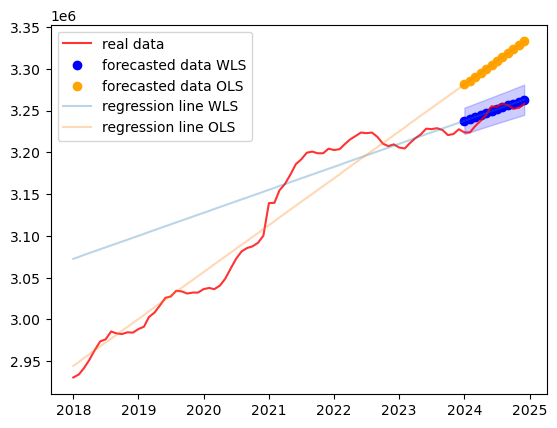

In [298]:
# forecast 12 months
m = len(df_test)
df_test['x'] = df_test.index.year+((df_test.index.month-1)/12)
X_pred = np.ones((m,p))
X_pred[:,1] = df_test.x.to_numpy()

# prediction
y_hat = X_train@theta
y_pred = X_pred@theta

# variances of prediction
sigma_hat_sq = (((y_train-y_hat).T)@Sigma_inv@(y_train-y_hat))/(len(df_train)-p)

# covariance matrix of predictions; formula taken from 'lecture_week3.R'
### WHY THE '1+...' ???? -> book p.46 proof 3.59
var_pred = sigma_hat_sq*(1+X_pred@np.linalg.inv(X_train.T@Sigma_inv@X_train)@X_pred.T) 

# basically 97.5%-CI for each prediction via Student T distribution
deg_f = len(df_train)-1 # degrees of freedom
iv_lwr, iv_upr = scipy.stats.t.interval(0.975,deg_f)

# prediction intervals
y_pred_iv_lower = y_pred+iv_lwr*np.sqrt(np.diag(var_pred))
y_pred_iv_upper = y_pred+iv_upr*np.sqrt(np.diag(var_pred))

# OLS
theta_ols, _, _, _ = np.linalg.lstsq(X_train, y_train)
y_pred_ols = X_pred@theta_ols

# plotting
plt.plot(df.index, df.total, alpha=.8, c='r', label='real data')
plt.plot(df_test.index, y_pred, alpha=.2, c='b')
plt.scatter(df_test.index, y_pred, c='b', label='forecasted data WLS')
plt.scatter(df_test.index, y_pred_ols, c='orange', label='forecasted data OLS')
plt.plot(df.index, X_comb@theta, alpha=.3, label='regression line WLS')
plt.plot(df.index, X_comb@theta_ols, alpha=.3, label='regression line OLS')
plt.fill_between(df_test.index, y_pred_iv_lower, y_pred_iv_upper, color='b', alpha=0.2)
plt.legend()

*Comment:*

As described in the earliest exercises, there has been a linear trend shift (maybe a saturation in car registrations, beginning 2022) in the time series. Thus taking only data into account that already incorporate that trendshift, makes the models prediction more reasonable. 
By choice of the weights, the (exponential) WLS model does exactly that. Therefore, the obvious choice for a prediction model is the WLS.

**3.6. (optional):**
Repeat (estimate parameters and make forecast for the next 12 months) for $λ \in \set{0.99, 0.8, 0.7, 0.6}$. How does the λ affect the predictions?
Comment on the forecasts - do the slopes of each model correspond to what you would (roughly) expect for the different λ’s?

-----

# 4 Recursive estimation and optimization of λ

Now we will fit the local trend model using Recursive Least Squares (RLS). The smart thing about recusive estimation is that we can update the parameter estimates with a minimum of calculations, hence it’s very fast and we don’t have to have keep the old data.


**4.1.** Write on paper the update equations of $\mathbf{R}_t$ and $\hat{\theta}_t$.


For $\mathbf{R}_t$ insert values and calculate the first 2 iterations, i.e. until you have the value of $\mathbf{R}_2$.

Initialize with

$$\mathbf{R}_0 =
\begin{bmatrix}
0.1 & 0   \\
0   & 0.1 \\
\end{bmatrix}$$

and

$$\mathbf{\theta}_0 =
\begin{bmatrix}
0  \\
0  \\ 
\end{bmatrix}$$


Everyone in the group must do this on paper and put a picture with the result for each in the report.

*done on paper* -> load in

**4.2.** Implement the update equations in a for-loop in a computer. Calculate the $\hat{\mathbf{\theta}}_t$ up to time $t = 3$.

Present the values and comment: Do you think it is intuitive to understand the details in the matrix calculations? If yes, give a short explanaition.

In [5]:
# recursive implementation
rep = 4
R = np.zeros((rep,2,2))
R[0] = 0.1*np.eye(2)

Thetas_hat = np.zeros((rep,2,1))

for t in range(1, rep):
    x_vec = X[t].reshape(-1,1)
    R[t] = R[t-1]+x_vec@x_vec.T
    Thetas_hat[t] = Thetas_hat[t-1]+np.linalg.inv(R[t])@x_vec@(y[t-1]-x_vec.T@Thetas_hat[t-1])

In [6]:
Thetas_hat

array([[[ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 7.19549866e-01],
        [ 1.45211160e+03]],

       [[ 9.74389658e-03],
        [ 1.45296426e+03]],

       [[-3.69611581e+00],
        [ 1.45444883e+03]]])

For each iterative (recursive) updated of the parameter estimates $\mathbf{\hat{\theta}}_t$, the first value is the intercept of the linear regression line and the second one the slope. Hence, we can see that the slope does only change slightly, but the intercept point is still receiving informative updates.

Well, the given the recursive equations:

$$\begin{align*}
\mathbf{R}_t &= \mathbf{R}_{t-1} + x_t x_t^T \\
\mathbf{\hat{\theta}}_t &= \mathbf{\hat{\theta}}_{t-1} + \mathbf{R}_t^{-1} x_t (Y_t - x_t^T \mathbf{\hat{\theta}}_{t-1})
\end{align*}$$

are not necessarily intuitive. But a good understanding can be derived from a general OLS model and some consideration.

The term $(Y_t - x_t^T \mathbf{\hat{\theta}}_{t-1})$ can be understood as the residual. The subterm $x_t^T \mathbf{\hat{\theta}}_{t-1}$ computes a prediction given the previous $\mathbf{\hat{\theta}}_{t-1}$ parameter estimates. That prediction is then subtracted from the actual observations for that time period.

Now we will draw some comparison to the regular, non-recursive OLS model. Imagine setting 

$$\begin{align*}
(Y_t - x_t^T \mathbf{\hat{\theta}}_{t-1}) &\ \hat{=} \ \hat{y}_t^T && \text{residual}\\
\Rightarrow \mathbf{\hat{\theta}}_t &= \mathbf{\hat{\theta}}_{t-1} + \mathbf{R}_t^{-1} x_t \hat{y}_t^T \\
&= \mathbf{\hat{\theta}}_{t-1} + \mathbf{R}_t^{-1} h_t \\
\end{align*}$$

then the similarities to the non-recursive OLS

$$\mathbf{\hat{\theta}}_t = (\mathbf{X}_t^T \mathbf{X}_t)^{-1} \mathbf{X}_t^T y_t = \mathbf{R}_t^{-1} h_t$$

become clear. Since $h_t$ can be interpreted as the "height of the parameter projection" (as $\mathbf{R}_t = \mathbf{X}_t^T \mathbf{X}_t$ is a projection of the design matrix $X_t$ into a symmetric, invertible matrix), it can be thought of as a scaled residual term.

Then overall the term becomes

$$\begin{align*}
& \mathbf{R}_t^{-1} x_t (Y_t - x_t^T \mathbf{\hat{\theta}}_{t-1}) \\
&= \mathbf{R}_t^{-1} x_t y_t^T \\
&= \mathbf{R}_t^{-1} h_t \\
&= \mathbf{\hat{\theta}}_t^* && \text{from non-recursive OLS} \\
\\
\Rightarrow \mathbf{\hat{\theta}}_t &= \mathbf{\hat{\theta}}_{t-1} + \mathbf{\hat{\theta}}_t^*
\end{align*}$$

So we can think of the new $\mathbf{\hat{\theta}}_t$ as an updated parameter estimate, based on the previous estimate AND a parameter estimate from a scaled residual prediction (also based on the previous $\mathbf{\hat{\theta}}_{t-1}$ estimate).

**4.3.** Calculate the estimates of $\mathbf{\hat{\theta}}_N$ and compare them to the OLS estimates of θ, are they close? Can you find a way to decrease the difference by modifying some initial values and explain why initial values are important to get right?

In [89]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# redefine the test dataset
df = pd.read_csv("DST_BIL54.csv")
df['time'] = pd.to_datetime(df['time'])
df = df.set_index("time")
df['x'] = df.index.year+((df.index.month-1)/12)
test_split_date = "2023-12-01"
df_train = df[df.index<=datetime.fromisoformat(test_split_date)]
df_test = df[df.index>datetime.fromisoformat(test_split_date)]

n = len(df_train)   # number of observations in training
p = 2               # number of model parameters/features

X = np.ones((n, p))
X[:,1] = df_train['x'].to_numpy()
y = df_train['total'].to_numpy()


In [16]:

# recursive implementation
def RLS(n_recursions:int, X:np.array, y:np.array, R_init_scalar:float=0.1, Thetas_hat_init:list=[0,0]) -> np.array:

    p = np.array(X).shape[1] # number of parameters theta_i

    # initial values
    R = np.zeros((n_recursions,p,p))
    R[0] = R_init_scalar*np.eye(p)

    Thetas_hat = np.zeros((n_recursions,p,1))
    Thetas_hat[0] = np.array(Thetas_hat_init).reshape(-1,1)

    for t in range(1, n_recursions):
        x_vec = X[t].reshape(-1,1)
        R[t] = R[t-1]+x_vec@x_vec.T
        Thetas_hat[t] = Thetas_hat[t-1]+np.linalg.inv(R[t])@x_vec@(y[t-1]-x_vec.T@Thetas_hat[t-1])

    return Thetas_hat

# get RLS thetas
thetas_hat_rls = RLS(n, X, y, 0.1)

# non recursive simple linear OLS
theta_hat_ols = np.linalg.inv(X.T@X)@X.T@y


Text(0, 0.5, 'OLS')

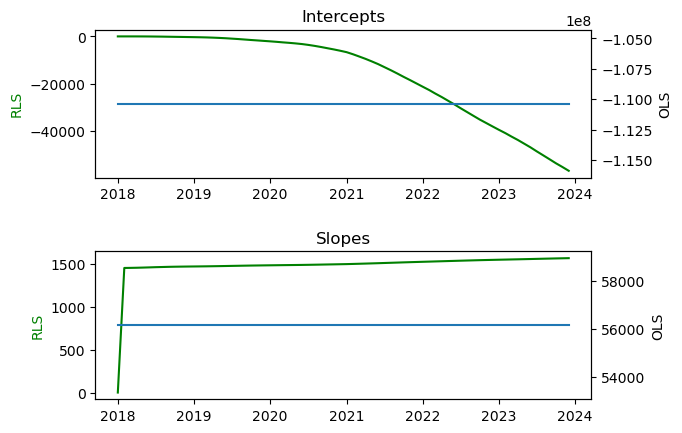

In [17]:
# plotting
rls_intercepts = thetas_hat_rls[:,0]
rls_slopes = thetas_hat_rls[:,1]
ols_intercept = theta_hat_ols[0]
ols_slope = theta_hat_ols[1]

fig = plt.figure()
fig.subplots_adjust(hspace=0.5)
ax1 = fig.add_subplot(2,1,1)
ax2 = ax1.twinx()
ax3 = fig.add_subplot(2,1,2)
ax4 = ax3.twinx()

ax1.set_title("Intercepts")
ax1.plot(df_train.index, rls_intercepts, c="g")
ax1.set_ylabel("RLS", color="g")
ax2.plot(df_train.index, np.repeat(ols_intercept, n))
ax2.set_ylabel("OLS")

ax3.set_title("Slopes")
ax3.plot(df_train.index, rls_slopes, color="g")
ax3.set_ylabel("RLS", color="g")
ax4.plot(df_train.index, np.repeat(ols_slope, n))
ax4.set_ylabel("OLS")

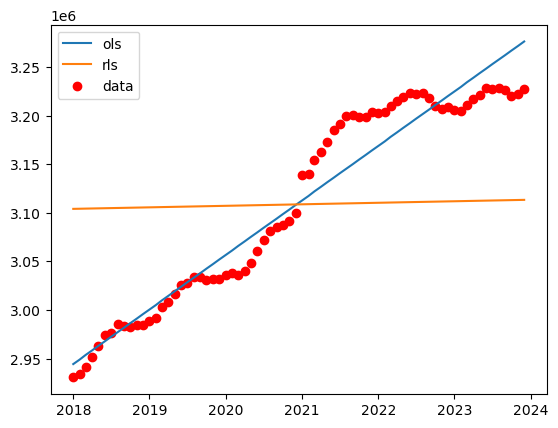

In [18]:
# latest regression lines
plt.plot(df_train.index, X@theta_hat_ols, label="ols")
plt.plot(df_train.index, X@thetas_hat_rls[-1], label="rls")
plt.scatter(df_train.index, y, label="data", color="r")
plt.legend()

The RLS model visibly sucks, without explicitly calculating the differences. Now we try with different starting values:

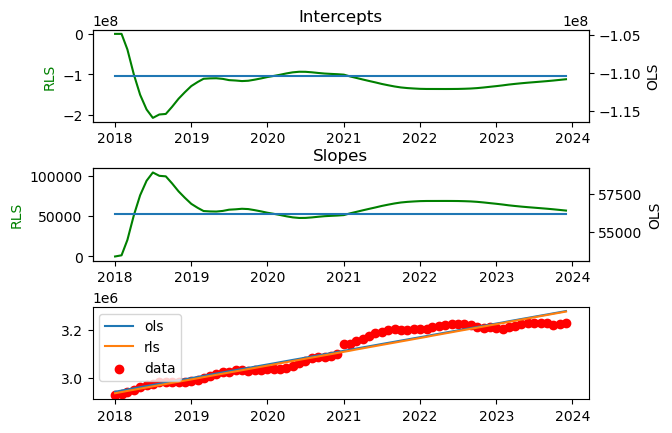

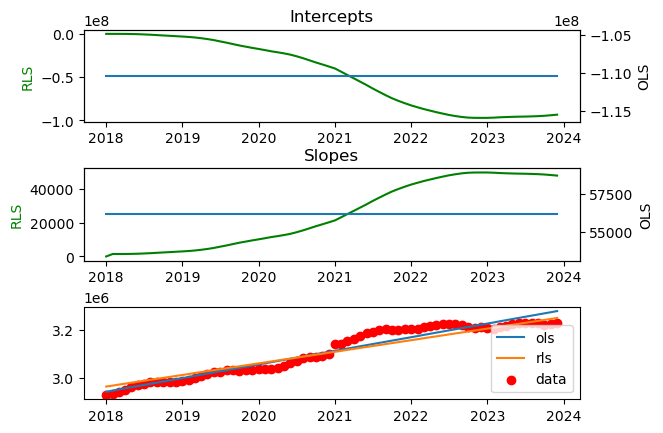

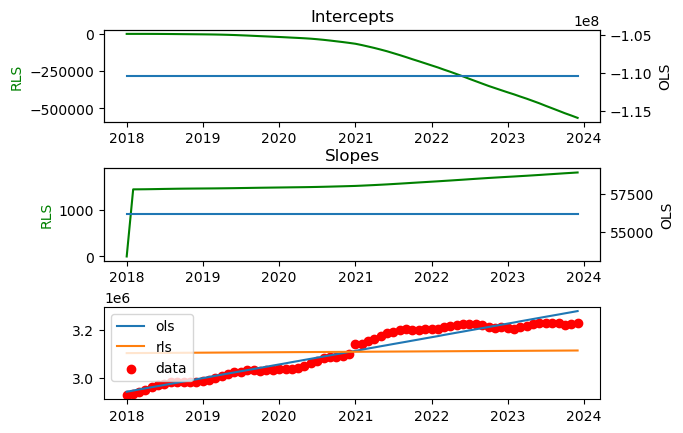

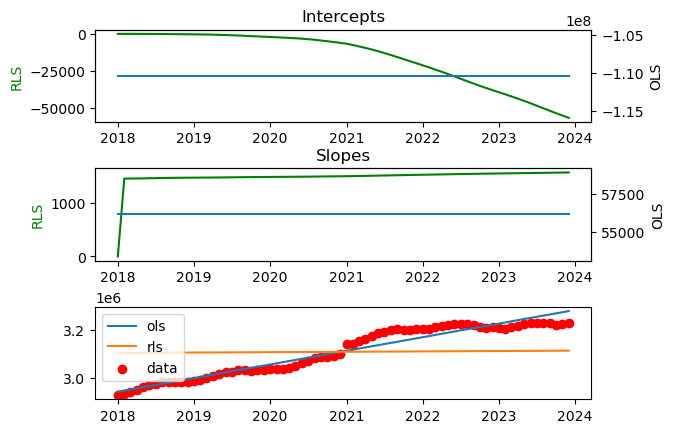

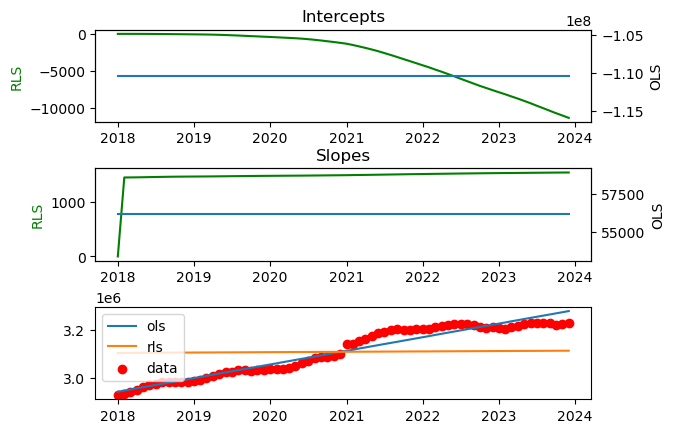

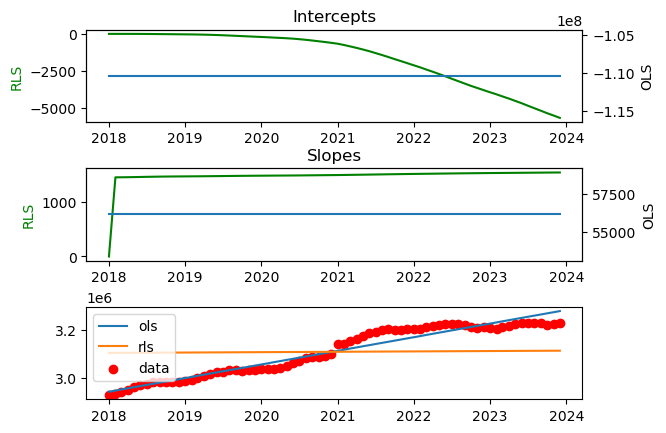

In [20]:
def plotRLSvsOLS(X, y, Thetas_init:float, R_init:float):

    # get the RLS thetas
    thetas_hat_rls = RLS(n, X, y, R_init, Thetas_init)

    # non recursive simple linear OLS
    theta_hat_ols = np.linalg.inv(X.T@X)@X.T@y

    # plotting
    rls_intercepts = thetas_hat_rls[:,0]
    rls_slopes = thetas_hat_rls[:,1]
    ols_intercept = theta_hat_ols[0]
    ols_slope = theta_hat_ols[1]

    fig = plt.figure()
    fig.subplots_adjust(hspace=0.5)
    ax1 = fig.add_subplot(3,1,1)
    ax2 = ax1.twinx()
    ax3 = fig.add_subplot(3,1,2)
    ax4 = ax3.twinx()
    ax5 = fig.add_subplot(3,1,3)

    ax1.set_title("Intercepts")
    ax1.plot(df_train.index, rls_intercepts, c="g")
    ax1.set_ylabel("RLS", color="g")
    ax2.plot(df_train.index, np.repeat(ols_intercept, n))
    ax2.set_ylabel("OLS")

    ax3.set_title("Slopes")
    ax3.plot(df_train.index, rls_slopes, color="g")
    ax3.set_ylabel("RLS", color="g")
    ax4.plot(df_train.index, np.repeat(ols_slope, n))
    ax4.set_ylabel("OLS")

    ax5.plot(df_train.index, X@theta_hat_ols, label="ols")
    ax5.plot(df_train.index, X@thetas_hat_rls[-1], label="rls")
    ax5.scatter(df_train.index, y, label="data", color="r")
    ax5.legend()

R_init = [10e-10, 10e-6, 10e-3, 0.1, 0.5, 1]
Thetas_init = np.repeat([0,0], len(R_init))
# Thetas_init = np.repeat(theta_hat_ols, len(R_init))
# Thetas_init = np.zeros((len(R_init), p, 1))
# for i in range(len(R_init)):
    # Thetas_init[i] = np.array(theta_hat_ols).reshape(-1,1)+(np.random.randint(-1000,1000))*np.random.rand()

for r, t in zip(R_init, Thetas_init):
    plotRLSvsOLS(X, y, t, r)

After trying different options, a reciprocal relationship becomes apparent: 

If $\mathbf{\hat{\theta}}_0$ is a good estimate (in our case, that was initializing it with the values from OLS), the $\mathbf{R}_0$ initial becomes more or less unimportant. 
However, if there is very little confidence in the first guess of $\mathbf{\hat{\theta}}_0$, then $\mathbf{R}_0$ becomes extremely important! Since that is usually the case, let's focus on why that might be. From 

$$\mathbf{\hat{\theta}}_t = \mathbf{\hat{\theta}}_{t-1} + \mathbf{R}_t^{-1} x_t (Y_t - x_t^T \mathbf{\hat{\theta}}_{t-1})$$

it becomes clear, that $\mathbf{R}_t$ has an inverse relationship with the parameter update. As elaborated on in *4.2*, $\mathbf{R}_t$ can be interpreted as a form of weight or scaling factor for the update. If $\mathbf{R}_t$ is very small ($10^{-10}$ to $10^{-10}$ worked well), its inverse becomes very big. Meaning it gives a lot of weight to the first updates. As the premises was, that we were very inconfident in our first parameter estimate, letting it change quickly is very reasonable.

**4.4.** Now implement RLS with forgetting (you just have to multiply with λ at one position in the $R_t$ update).
Calculate the parameter estimates: $\mathbf{\hat{\theta}}_{1,t}$ (the intercept) and $\mathbf{\hat{\theta}}_{2,t}$ (the slope), for $t = 1, . . . , N$ first with $λ = 0.7$ and then with $λ = 0.99$. Provide a plot for each parameter. In each plot include the estimates with both λ values (a line for each). Comment on the plots.


You might want to remove the first few time points, they are what is called a “burn-in” period
for a recursive estimation.


*Tip:* It can be advantageous to put the loop in a function, such that you don’t repeat the code too much! (it’s generally always a good idea to use functions, as soon as you need to run the same code more than once).
You might want to compare the estimates for t = N with the WLS estimates for the same λ values. Are they equal?

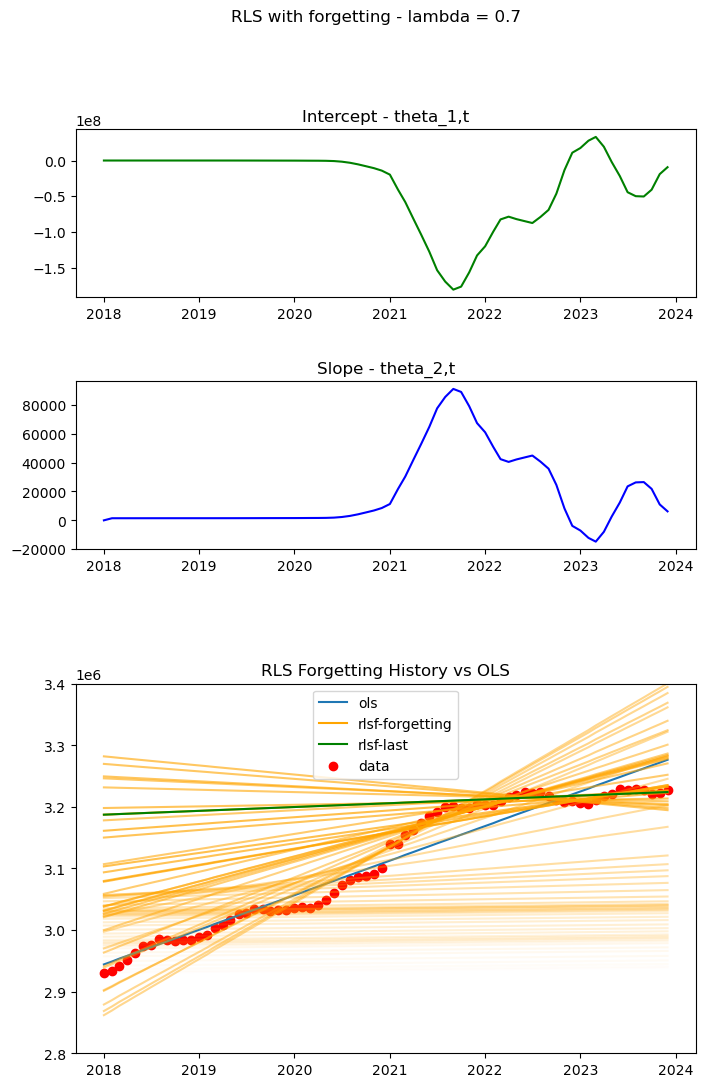

In [21]:
# recursive implementation
def RLSForgetting(n_recursions:int, X:np.array, y:np.array, R_init_scalar:float=0.1, Thetas_hat_init:list=[0,0], lam:float=0.9) -> np.array:

    p = np.array(X).shape[1] # number of parameters theta_i

    # initial values
    R = np.zeros((n_recursions,p,p))
    R[0] = R_init_scalar*np.eye(p)

    Thetas_hat = np.zeros((n_recursions,p,1))
    Thetas_hat[0] = np.array(Thetas_hat_init).reshape(-1,1)

    for t in range(1, n_recursions):
        x_vec = X[t].reshape(-1,1)
        R[t] = R[t-1]*lam+x_vec@x_vec.T
        Thetas_hat[t] = Thetas_hat[t-1]+np.linalg.inv(R[t])@x_vec@(y[t-1]-x_vec.T@Thetas_hat[t-1])
    return Thetas_hat

# plot RLS parameters
def plotRLSParams(X, y, thetas_rls, lam:float, thetas_ols=theta_hat_ols, df=df_train):
    fig = plt.figure(figsize=(8,12))
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle(f"RLS with forgetting - lambda = {lam}")
    ax1 = fig.add_subplot(4,1,1)
    ax2 = fig.add_subplot(4,1,2)
    ax3 = fig.add_subplot(2,1,2)

    ax1.set_title("Intercept - theta_1,t")
    ax1.plot(df.index, thetas_rls[:,0], c="g")

    ax2.set_title("Slope - theta_2,t")
    ax2.plot(df.index, thetas_rls[:,1], color="b")

    ax3.set_title("RLS Forgetting History vs OLS")
    ax3.plot(df_train.index, X@thetas_ols, label="ols")
    for i, w in enumerate(np.linspace(0,0.7, len(thetas_rls)-1)):
        ax3.plot(df_train.index, X@thetas_rls[i], c="orange", alpha=w)
    ax3.plot(df_train.index, X@thetas_rls[-1], label="rlsf-forgetting", c="orange")
    ax3.plot(df_train.index, X@thetas_rls[-1], label="rlsf-last", c="green")
    ax3.scatter(df_train.index, y, label="data", color="r")
    ax3.set_ylim(2.8e6, 3.4e6)
    ax3.legend()

# get RLS thetas
thetas_hat_rlsf = RLSForgetting(n, X, y, 0.1, [0,0], 0.7)

plotRLSParams(X, y, thetas_hat_rlsf, 0.7)

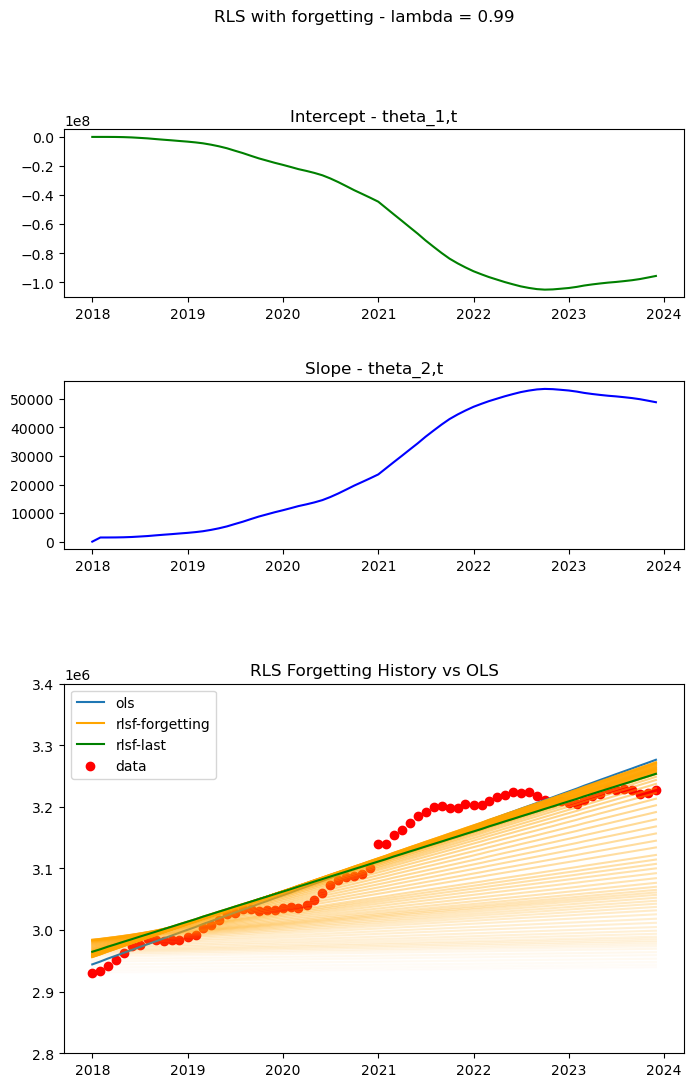

In [88]:
thetas_hat_rlsf = RLSForgetting(n, X, y, 0.00001, [0,0], 0.99)
plotRLSParams(X, y, thetas_hat_rlsf, 0.99)

Compared to WLS local models, the RLS with forgetting (RLS-F) performs similarly. However, there is a big difference in sensitivity to the magnitude of $\lambda$. For the RLS-F, the closer $\lambda$ is to $1$, the less the model "forgets" and the worse the predictive performance of the model. 

Generally, the relationship between teh value of $\lambda$ and the "forgetting" property, is analogous for the local WLS model, with the great exception, that RLS-F has to fight with the "burn-in" of the first periods. 
Especially with bad starting values, the far-off estimates from the start of the recursion, have a larger effect on the overall predictive quality of RLS-F, if the model is less "forgetting".

**4.5.** Make one-step predictions

$$\hat{y}_{t+1|t} = x_{t+1|t} \hat{θ}_t$$

The notation $t + 1|t$ means the variable one-step ahead, i.e. at time $t + 1$, given information available at time $t$. So this notation is used to denote predictions. For $x_{t+1|t}$ we do have the values ahead in time for a trend model – in most other situations we must use forecasts of the model inputs.

Now calculate the one-step ahead residuals

$$\hat{ε}_{t|t−1} = \hat{y}_{t|t−1} − y_{t−1}$$

note the shift $“t + 1|t”$ to “$t|t − 1$”: both means one-step ahead.

Plot them for $t = 5, . . . , N$ first with $λ = 0.7$ and then $λ = 0.99$ (note, we remove a burn-in period $(t = 1, . . . , 4)$, might not be necessary, but usually a good idea when doing recursive estimation – depends on the initialization values).
Comment on the residuals, e.g. how do they vary over time?

In [23]:
# predictions on the training dataset
def RLSOneStepPrediction(X, y, thetas, t):
    y_pred = X[t+1]@thetas[t]
    res = y_pred - y[t+1]
    return y_pred, res

thetas_hat_rlsf_lam07 = RLSForgetting(n, X, y, 0.1, [0,0], 0.7)
thetas_hat_rlsf_lam099 = RLSForgetting(n, X, y, 0.1, [0,0], 0.99)

model07 = {"yhat":[], "res":[]}
model099 = {"yhat":[], "res":[]}

for t in range(5, len(df_train)-1):
    yhat, res = RLSOneStepPrediction(X, y, thetas_hat_rlsf_lam07, t)
    model07["yhat"].append(yhat)
    model07["res"].append(res)
    yhat, res = RLSOneStepPrediction(X, y, thetas_hat_rlsf_lam099, t)
    model099["yhat"].append(yhat)
    model099["res"].append(res)

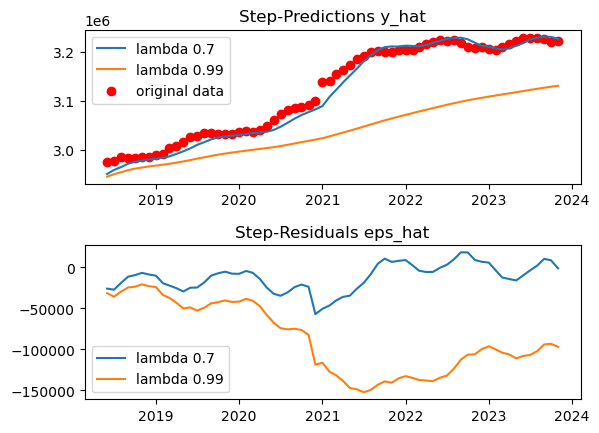

In [24]:
plt.figure().subplots_adjust(hspace=0.4)
plt.subplot(2,1,1)
plt.title("Step-Predictions y_hat")
plt.plot(df_train.iloc[5:-1].index, model07["yhat"], label="lambda 0.7")
plt.plot(df_train.iloc[5:-1].index, model099["yhat"], label="lambda 0.99")
plt.scatter(df_train.iloc[5:-1].index, y[5:-1], c="r", label="original data")
plt.legend()

plt.subplot(2,1,2)
plt.title("Step-Residuals eps_hat")
plt.plot(df_train.iloc[5:-1].index, model07["res"], label="lambda 0.7")
plt.plot(df_train.iloc[5:-1].index, model099["res"], label="lambda 0.99")
plt.legend()

The residuals become greater (magnitude-wise) over time for $\lambda=0.99$, whilst for $\lambda=0.7$ the stay relatively low throughout the time-series.

This is also expected, due to the previously commented performance of the model with both parameters.
For some reason, the step-wise prediction is better than expected, compared to a complete regression line with each parameter estimate at time t.
It is not entirely clear, why that is the case, especially the date, where the residuals start to explode, does not correspond to the trend change in the original data.

However, it does correspont to the time t at intercept point between the regression line for $\hat{θ}_N$ an the interpolated line of the original data. 
Nevertheless, the residual between this regression line and the true data, should be almost symmetrical, while for the step-residuals, there is a clear break at around 2021. This behaviour is not yet understood.

**4.6.** Optimize the forgetting for the horizons $k = 1, . . . , 12$. First calculate the k-step residuals

$$\hat{ε}_{t|t−k} = \hat{y}_{t|t−k} − y_{t−k}$$
$$\Leftrightarrow \hat{ε}_{t+k|t} = \hat{y}_{t+k|t} − y_{t+k}$$

then calculate the k-step Root Mean Square Error (RMSEk)

$$RMSE_k = \sqrt{\frac{1}{N-k} \sum_{t=k}^N \hat{ε}_{t|t−k}^2}$$

Do this for a sequence of λ values (e.g. $ 0.5,0.51,. . . ,0.99 $) and make a plot.

Comment on: Is there a pattern and how would you choose an optimal value of λ? Would you let λ depend on the horizon?

In [79]:
def RLSKStepPrediction(X, y, thetas, t, k):
    y_pred = X[t+k]@thetas[t]
    res = y_pred - y[t+k]
    return y_pred, res

In [80]:
def RMSEk(k, X, y, thetas):
    N = np.array(X).shape[0]
    sq_residuals = []
    for t in range(N-k):
        _, res = RLSKStepPrediction(X, y, thetas, t, k)
        sq_residuals.append(res**2)
    s = sum(sq_residuals[k:])
    return np.sqrt((1/(N-k))*s)

In [81]:
res = {}
lambdas = np.arange(0.5, 0.99, 0.01)
for k in range(1, 12+1):
    res.update({k:[]})
    for lam in lambdas:
        thetas = RLSForgetting(np.array(X).shape[0], X, y, 10e-10, [0,0], lam)
        rmse = RMSEk(k,X,y,thetas)
        res[k].append(rmse)

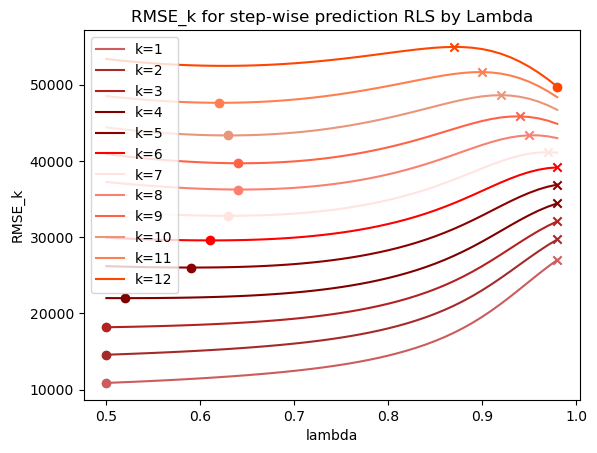

In [87]:
import matplotlib.colors as mcols

color_list = list(mcols.CSS4_COLORS.keys())
names = sorted(mcols.CSS4_COLORS, key=lambda c: tuple(mcols.rgb_to_hsv(mcols.to_rgb(c))))

plt.title("RMSE_k for step-wise prediction RLS by Lambda")
for k in range(1, 12+1):
    plt.plot(lambdas, res[k], label=f"k={k}", c=names[k+15])
    min_, min_lam = min(res[k]), lambdas[np.argmin(res[k])]
    max_, max_lam = max(res[k]), lambdas[np.argmax(res[k])]
    plt.scatter(min_lam, min_, marker="o",c=names[k+15])
    plt.scatter(max_lam, max_, marker="x",c=names[k+15])
plt.ylabel("RMSE_k")
plt.xlabel("lambda")
plt.legend()

The pattern is that, obviously having a larger $k$ values (which means predicting further into the future), has a higher $RMSE_k$, because there is just more uncertainty.
Overall, smaller values of $\lambda$ are better to minimize the $RMSE_k$ for the step-wise prediction. As noted before, this has to do with the the notion of "forgetting" in exponentially weighted models.

An interesting phenomenon is the convergence / down-bend of the $RMSE_k$ for high-k models for $\lambda \to 1$. A way to explain it, would be that for such models that practically don't "forget", they tend to learn more global trends. 
Which is exactly the opposite of being good at prediction shorter term trend-shifts. It is more or less thanks to the dataset, that there is a notion of returning to such long term trend. There is a small peak of error, where these models fail to fit for a short-term shift in the trend.

**4.7.** Make predictions of the test set using RLS. You can use a single λ value for all horizons, or choose some way to have different values, and run the RLS, for each horizon.
Make a plot and compare to the predictions from the other models (OLS and WLS).
You can play around a bit, for example make a plot of the 1 to 12 steps forecasts at each time step to see how they behave.

Based on the exercise above, one would choose $\lambda \in [0.5, 0.65]$ for $k \in \set{1, ..., 12}$.

In [134]:
# RLS by k-step-wise predictions
lam = 0.57
k = 12                          # horizon of prediction
p = 2                           # num parameters - 2 for linear

X_test = np.ones((k,2))
X_test[:,1] = df_test['x'].to_numpy()
y_test = df_test['total'].to_numpy()
    
# fit the RLS forgetting model
thetas_hat_rlsf = RLSForgetting(np.array(X).shape[0], X, y, 10e-10, [0,0], lam)

# step-wise prediction -> len(test)=12=k is the horizon, just use the last theta_N
y_pred_rls = X_test@thetas_hat_rlsf[-1]

# fit OLS model
theta_hat_ols = np.linalg.inv(X.T@X)@X.T@y
y_pred_ols = X_test@theta_hat_ols

# fit local (exponential) WLS model - same lambda
df_train['weight'] = np.array([lam**(len(df_train)-i-1) for i in range(len(df_train))])
Sigma_inv = np.eye(len(df_train))*df_train['weight'].to_numpy().reshape(-1,1)
theta_hat_ewls = np.linalg.inv(X.T@Sigma_inv@X)@X.T@Sigma_inv@y
y_pred_ewls = X_test@theta_hat_ewls

# fit constant WLS model - same lambda
Sigma_inv = np.eye(len(df_train))*lam
theta_hat_wls = np.linalg.inv(X.T@Sigma_inv@X)@X.T@Sigma_inv@y
y_pred_wls = X_test@theta_hat_wls

/var/folders/5b/3rjqcwwn5s93khgglxljhv140000gn/T/ipykernel_17355/224061563.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['weight'] = np.array([lam**(len(df_train)-i-1) for i in range(len(df_train))])


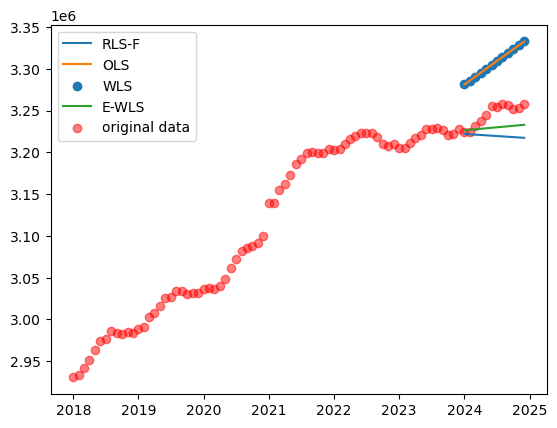

In [136]:
# plotting
plt.plot(df_test.index, np.concatenate([y_pred_rls.flatten()]), label="RLS-F")
plt.plot(df_test.index, np.concatenate([y_pred_ols.flatten()]), label="OLS")
plt.scatter(df_test.index, np.concatenate([y_pred_wls.flatten()]), label="WLS")
plt.plot(df_test.index, np.concatenate([y_pred_ewls.flatten()]), label="E-WLS")
plt.scatter(df.index, df['total'], label="original data", alpha=0.5, c='r')
plt.legend()

Conclusion:

If WLS is constantly weighted, it doesn't make a difference to OLS. But that is expected, as in the model formulation, it is simply a scalar that can be pulled out without actually influencing, solving the minimization problem (for the squared error).

Overall the exponential WLS model (E-WLS) performs the best. while still not being optimal. As observed in *exercise 4.6* there are some hyperparameters $\lambda$ that minimize the $RMSE_k$. However, the range for optimal $\lambda$ is resulting in a better model.
The perceptually best values are for $\lambda \in [0.85, 0.95]$.

**4.8.** Reflexions on time adaptive models - are there pitfalls!?

- Consider overfitting vs. underfitting.
- Are there challenges in creating test sets when data depends on time (in contrast to data not dependend on time)?
- Can recursive estimation and prediction aliviate challenges with test sets for time dependent data?
- Can you come up with other techniques for time adaptive estimation?
- Additional thoughts and comments?

1. The problem with these simple linear models is definitely underfitting. All constructed models performed somewhat poorly in explaining the data and predicting it.
There would be mainly 3 knobs to consider:
- increase the amount of parameters for the model (thus making it a multivariate linear regression; resulting in hyperplanes as predictors) - the dataset has more to offer
- increase the model complexity to for example polynomial models - however, these come with different problems (especially for time-series; asymptotic behaviour towards boundries)
- hyperparameter tuning of $\lambda$ or even the structure of the entire weight matrix $\Sigma$

2. There are challenges in time-series due to covariance and independence assumptions. So far, each observation is treated as an independent random variable (with the exception of an exponential weight matrix, which somewhat introduces the notion of more recent samples being more important than older ones). 

    However, time series can present trend-changes (as is the example here) or even seasonality behaviours. This is different from a dataset, that simply maps one variable or event to another, where order of the events is not relevant.
    
    Thus, the choice of split of a test da can dramatically impact the model's predictive capability. The time frame chosen can include of not include trend changes, that may or may not be present in the other split of data.

    One way to handle this would be by cross-validation. A common method, that would also be applicable to time-series is an adjusted K-Fold cross-validation. Basically, creating different models by sequentially leaving out some parts of the training data and then weighting by the confidence of each model. Bootstrapping is another famous method but due to its nature not applicable.

3. Actually the step-wise prediction (for only the test dataset though) was supperior to global model parameters.
Yet, it was not applicable or helpful for **actual** prediction, as the time horizon to predict into the future may vary and the last parameter estimation cuts of at the very end of the training dataset. Hence it is does not have the advantages of continually updating parameters any longer.

    However, in general the RLS models suffer from severe 'burn-in', initial guess uncertainty and more delicate hyperparameter tuning. Additionally, they are more computationally expensive.
    These properties make then not a good fit so far, but it might depend on the origin of the time series.

4. Some ideas for adaptive (maybe recursive) estimation on time series:
- Bayesian models, taking new information to update likelihood and posterior; would also allow for a good initial estimate depending on the origin of the data for the prior distribution
- momentum models; taking sudden large jumps in time-series as a penalty to a weight, not to update much -> would be great for noisy time series
- averaging different weighted models to capture notions of local trend changes and reversion to a global trend
- dynamic weight models; adjust the size of a WLS dynamically/recursively, based on the variance, noise or momentum of data
- recurrent neural-network based models -> most often a good predictor but hard to interpret or modify without continuous re-training (very computationally expensive)
- regularized models: Ridge-regression (L2) or ISTA (L1), the latter does not work well on most time-series because the L1 norm penalizes mostly "edges"

5. Additional Comments:
- RLS models are quite the pain in the a** to get right, especially choosing initial values for $\theta$, $R_t$ and $\lambda$
- a huge pitfall is to think that: modelling a time series, that is very obviously not showing a linear behavior, with a simple linear model, is a good idea
- as for the initial description and visual analysis, it became apparent that there are trend changes present; so much in fact, that one could possibly also just take the last 2-3 data points to predict